# 1. Data Preparation 

## Import the data

In [107]:
from sklearn.datasets import make_circles

n_samples = 1000

x,y = make_circles(n_samples,
                   noise=0.03,
                   random_state = 42)

x[:10], y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]), array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

## Make the data in tabular form

In [108]:
import pandas as pd

circles_table = pd.DataFrame({"X1":x[:,0],
                              "X2": x[:,1],
                              "Label": y})
circles_table.head(10)

,X1,X2,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


## Draw the circles

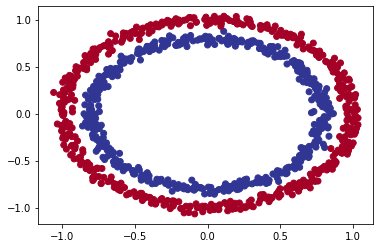

In [109]:
import matplotlib.pyplot as plt

plt.scatter(x=x[:,0],
            y=x[:,1],
            c=y,
            cmap=plt.cm.RdYlBu
            )

plt.show()

## Find the shapes of the data

In [110]:
x.shape,y.shape

((1000, 2), (1000,))

## Get The Data Ready ( Trun into Tensor )

In [111]:
type(x)

numpy.ndarray

In [112]:
import torch

x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)


In [113]:
type(x), x.dtype

(torch.Tensor, torch.float32)

In [114]:
x[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]), tensor([1., 1., 1., 1., 0.]))

## Make some device agnostic code

In [115]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## Split The Data into Train and Test Data

In [116]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
x_train[:5], x_test[:5], y_train[:5],y_test[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]), tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438]]), tensor([1., 0., 0., 0., 1.]), tensor([1., 0., 1., 0., 1.]))

In [117]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

## Take the data to the right device

In [118]:
x_train, x_test, y_train, y_test = x_train.to(device), x_test.to(device), y_train.to(device), y_test.to(device)
x_train.device, x_test.device, y_train.device,y_test.device

(device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0))

In [119]:
x_train[:5], x_test[:5], y_train[:5],y_test[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]], device='cuda:0'), tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438]], device='cuda:0'), tensor([1., 0., 0., 0., 1.], device='cuda:0'), tensor([1., 0., 1., 0., 1.], device='cuda:0'))

# 2. Building a Model

In [120]:
from torch import nn

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  def forward (self, x):
    return self.layer_2(self.layer_1(x))

In [121]:
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

## nn.sequential instead of nn.module

In [122]:
model_0 = nn.Sequential (
   nn.Linear(in_features=2, out_features=5),
   nn.Linear(in_features=5, out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

## Untrained Predicton

In [123]:
untrained_y_preds = model_0 (x_test)
untrained_y_preds[:10], untrained_y_preds.shape

(tensor([[-0.0338],
         [-0.0309],
         [ 0.0894],
         [-0.0692],
         [ 0.2967],
         [ 0.2968],
         [ 0.1405],
         [ 0.2178],
         [ 0.0805],
         [-0.0284]], device='cuda:0', grad_fn=<SliceBackward0>),
 torch.Size([200, 1]))

In [124]:
# actual y
y_test[:10]

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0')

# Setup Loss and Optimization Functions

In [125]:
loss_fn = nn.BCEWithLogitsLoss() # this one has the sigmoid activation built in
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.1)

## Accuracy Caculation Function

In [126]:
def accuracy(y_true, y_preds):
  correct = torch.eq(y_true,y_preds).sum().item()
  acc = (correct/len(y_preds)) * 100
  return acc

# 3. Train The Model

In [127]:
import torch

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

for epoch in range(epochs):
  model_0.train()
  # forward pass
  y_logits = model_0(x_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  # calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy(y_true = y_train,
                 y_preds=y_preds)
  # zero the gradient
  optimizer.zero_grad()

  # backpropergation
  loss.backward()

  # Gradient decent
  optimizer.step()

  ################## Test ############################
  model_0.eval()
  with torch.inference_mode():
   test_y_logits = model_0(x_test).squeeze()
   test_y_preds = torch.round(torch.sigmoid(test_y_logits))

   test_loss = loss_fn(test_y_logits,
                      y_test)
   test_acc = accuracy(y_true=y_test,
                      y_preds=test_y_preds)
  
  # print after every 100 epochs
  if epoch % 100 == 0:
    print(f"Loss : {loss} acc : {acc}  Test Loss : {test_loss}  Test Acc : {test_acc}")

Loss : 0.6979604959487915 acc : 51.87500000000001  Test Loss : 0.6943961381912231  Test Acc : 57.99999999999999
Loss : 0.6933070421218872 acc : 49.25  Test Loss : 0.6927053928375244  Test Acc : 53.0
Loss : 0.6931036710739136 acc : 50.875  Test Loss : 0.6933566331863403  Test Acc : 49.0
Loss : 0.6930382251739502 acc : 51.125  Test Loss : 0.6937592625617981  Test Acc : 46.5
Loss : 0.6930078268051147 acc : 51.24999999999999  Test Loss : 0.6940339207649231  Test Acc : 47.5
Loss : 0.6929932236671448 acc : 50.875  Test Loss : 0.6942278742790222  Test Acc : 47.0
Loss : 0.6929861903190613 acc : 51.24999999999999  Test Loss : 0.6943649649620056  Test Acc : 46.5
Loss : 0.6929829120635986 acc : 51.24999999999999  Test Loss : 0.6944613456726074  Test Acc : 46.0
Loss : 0.6929812431335449 acc : 51.5  Test Loss : 0.6945286393165588  Test Acc : 45.5
Loss : 0.6929805874824524 acc : 51.37500000000001  Test Loss : 0.694575309753418  Test Acc : 45.0


## Download helper functions

In [128]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("File already exists")
else:
  print ("Downloading the file helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)


from helper_functions import plot_predictions, plot_decision_boundary

File already exists


## Lets visualize ( Draw the model )

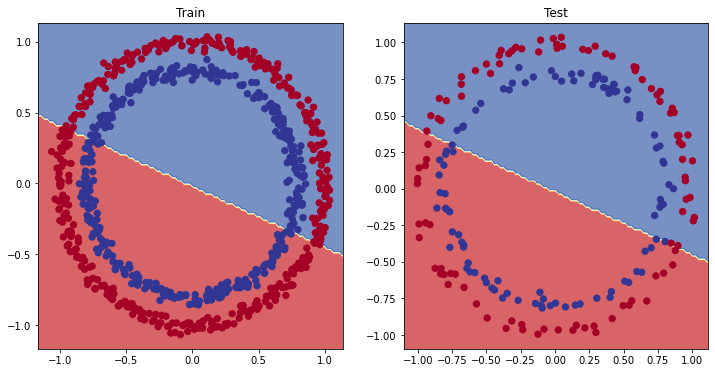

In [129]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, x_test, y_test)


# MAKING THE MODEL NON-LINEAR


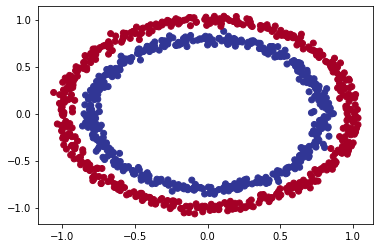

In [139]:
# LETS VISULAIZE THE DATA FIRS
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import torch 
n_samples = 1000

x,y = make_circles(n_samples,
                   noise=0.03,
                   random_state = 42)



x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.RdYlBu)

## Recreating The data

In [159]:
from sklearn.model_selection import train_test_split



x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

x_train, x_test, y_train, y_test = x_train.to(device), x_test.to(device), y_train.to(device), y_test.to(device)
x_train.device, x_test.device, y_train.device,y_test.device

x_test[:5]

tensor([[-0.3752,  0.6827],
        [ 0.0154,  0.9600],
        [-0.7028, -0.3147],
        [-0.2853,  0.9664],
        [ 0.4024, -0.7438]], device='cuda:0')

## Creatin the Non Linear Model

In [167]:
from torch import nn
class makeCircleV1 (nn.Module):
  def __init__(self):
   super().__init__()
   self.layer_1 = nn.Linear(in_features=2, out_features=10)
   self.layer_2 = nn.Linear(in_features=10, out_features=10)
   self.layer_3 = nn.Linear(in_features=10, out_features=1)
   self.relu = nn.ReLU()


  def forward (self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_1 = makeCircleV1().to(device)
model_1
  


makeCircleV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

## Train and Test loop for the non linear model

In [168]:
loss_fn = nn.BCEWithLogitsLoss() # this one has the sigmoid activation built in
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr=0.1)

In [173]:
torch.manual_seed(42)


epochs = 1000

for epoch in range(epochs):
  
  y_logits = model_1(x_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy (y_true= y_train,
                  y_preds = y_preds)
  
  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  ### test
  model_1.eval()
  with torch.inference_mode():
    test_y_logits = model_1(x_test).squeeze()
    test_y_preds = torch.round(torch.sigmoid(test_y_logits))

    test_loss = loss_fn(test_y_logits,y_test)
    test_acc = accuracy(y_true = y_test,
                        y_preds = test_y_preds)
  if epoch % 100 == 0:
   print(f"Epochs : {epoch} Loss : {loss:.5f} acc : {acc:.2f}% Test Loss : {test_loss:.5f} Test Acc : {test_acc:.2f}%")
  


Epochs : 0 Loss : 0.01048 acc : 100.00% Test Loss : 0.02451 Test Acc : 99.50%
Epochs : 100 Loss : 0.01011 acc : 100.00% Test Loss : 0.02389 Test Acc : 99.50%
Epochs : 200 Loss : 0.00976 acc : 100.00% Test Loss : 0.02332 Test Acc : 99.50%
Epochs : 300 Loss : 0.00943 acc : 100.00% Test Loss : 0.02278 Test Acc : 99.50%
Epochs : 400 Loss : 0.00913 acc : 100.00% Test Loss : 0.02228 Test Acc : 99.50%
Epochs : 500 Loss : 0.00885 acc : 100.00% Test Loss : 0.02181 Test Acc : 99.50%
Epochs : 600 Loss : 0.00858 acc : 100.00% Test Loss : 0.02138 Test Acc : 99.50%
Epochs : 700 Loss : 0.00833 acc : 100.00% Test Loss : 0.02094 Test Acc : 99.50%
Epochs : 800 Loss : 0.00809 acc : 100.00% Test Loss : 0.02053 Test Acc : 99.50%
Epochs : 900 Loss : 0.00787 acc : 100.00% Test Loss : 0.02015 Test Acc : 99.50%


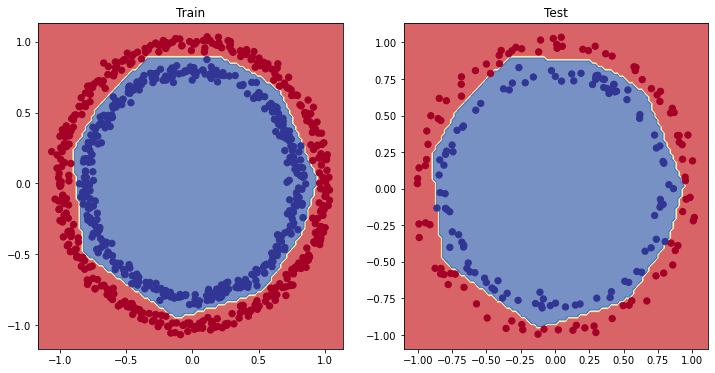

In [174]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, x_test, y_test)